In [1]:
import numpy as np 
import pandas as pd 
import sqlite3
import seaborn as sn

#conn = sqlite3.connect('/kaggle/input/188-million-us-wildfires/FPA_FOD_20170508.sqlite')
conn = sqlite3.connect('FPA_FOD_20170508.sqlite')
print("Connected to database...")

#cursor = conn.cursor()
#cursor.execute("SELECT * FROM Fires")
#rows = cursor.fetchall()
#print()
df = pd.read_sql_query("SELECT * from Fires", conn)
print("Dataframe acquired...")

conn.close()
print("Connection closed.")

Connected to database...
Dataframe acquired...
Connection closed.


# DATA PRE-PROCESSING

In [18]:
df.dtypes

FIRE_YEAR             int64
DISCOVERY_DOY         int64
DISCOVERY_TIME      float64
STAT_CAUSE_CODE     float64
STAT_CAUSE_DESCR     object
CONT_DOY            float64
CONT_TIME           float64
FIRE_SIZE           float64
FIRE_SIZE_CLASS      object
LATITUDE            float64
LONGITUDE           float64
OWNER_CODE          float64
OWNER_DESCR          object
STATE                object
COUNTY               object
DURATION            float64
dtype: object

In [4]:
## CHANGE None type to NaN
df = df.fillna(value=np.nan)
print("Complete.")

Complete.


In [5]:
## DATE --> DURATION
# DATE to JULIAN DATE
epoch = pd.to_datetime(0, unit='s').to_julian_date()
df.CONT_DATE = pd.to_datetime(df.CONT_DATE - epoch, unit='D')
df.DISCOVERY_DATE = pd.to_datetime(df.DISCOVERY_DATE - epoch, unit='D')

# ADD DURATION TO df
df['DURATION'] = (df.CONT_DATE - df.DISCOVERY_DATE).dt.days
print("Complete.")

Complete.


In [6]:
## TIME TO int (really float)
df['DISCOVERY_TIME'] = pd.to_numeric(df['DISCOVERY_TIME'])
df['CONT_TIME'] = pd.to_numeric(df['CONT_TIME'])
print("Complete.")

Complete.


In [7]:
## DROP REDUNDANT FEATURES + IDENTIFIERS
df = df.drop(['OBJECTID', 
         'FOD_ID',
         'FPA_ID',
         'SOURCE_SYSTEM_TYPE',
         'SOURCE_SYSTEM',
         'NWCG_REPORTING_AGENCY',
         'NWCG_REPORTING_UNIT_ID',
         'NWCG_REPORTING_UNIT_NAME',
         'SOURCE_REPORTING_UNIT',
         'SOURCE_REPORTING_UNIT_NAME',
         'LOCAL_FIRE_REPORT_ID',
         'LOCAL_INCIDENT_ID',
         'FIRE_CODE',
         'FIRE_NAME',
         'ICS_209_INCIDENT_NUMBER',
         'ICS_209_NAME',
         'MTBS_ID',
         'MTBS_FIRE_NAME',
         'COMPLEX_NAME',
         'DISCOVERY_DATE',
         'CONT_DATE',
         'FIPS_CODE',
         'FIPS_NAME',
         'Shape'], axis=1)
print("Complete.")
df

Complete.


,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,DURATION
0,2005,33,1300.0,9.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,0.0
1,2004,133,845.0,1.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,0.0
2,2004,152,1921.0,5.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,0.0
3,2004,180,1600.0,1.0,Lightning,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,5.0
4,2004,180,1600.0,1.0,Lightning,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,2015,269,1726.0,13.0,Missing/Undefined,269.0,1843.0,0.01,A,40.481637,-122.389375,13.0,STATE OR PRIVATE,CA,NaN,0.0
1880461,2015,278,126.0,9.0,Miscellaneous,NaN,NaN,0.20,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN
1880462,2015,122,2052.0,13.0,Missing/Undefined,NaN,NaN,0.10,A,37.617619,-120.938570,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN
1880463,2015,287,2309.0,13.0,Missing/Undefined,NaN,NaN,2.00,B,37.672235,-120.898356,12.0,MUNICIPAL/LOCAL,CA,NaN,NaN


In [28]:
print('MEAN:')
print(df.groupby(['FIRE_SIZE_CLASS']).mean()['FIRE_SIZE'])
print('STD:')
print(df.groupby(['FIRE_SIZE_CLASS']).std()['FIRE_SIZE'])
for each in 'ABCDEFG':
    print('CLASS',each)
    print('min: ', min(df.FIRE_SIZE[df.FIRE_SIZE_CLASS == each]))
    print('max: ', max(df.FIRE_SIZE[df.FIRE_SIZE_CLASS == each]))

MEAN:
FIRE_SIZE_CLASS
A        0.118801
B        2.146998
C       28.531914
D      161.801034
E      512.854904
F     2130.395128
G    27388.190703
Name: FIRE_SIZE, dtype: float64
STD:
FIRE_SIZE_CLASS
A        0.057638
B        1.984072
C       20.550223
D       54.010924
E      184.634766
F     1044.835668
G    48469.305248
Name: FIRE_SIZE, dtype: float64
CLASS A
min:  1e-05
max:  0.25
CLASS B
min:  0.250137
max:  9.99
CLASS C
min:  10.0
max:  99.9
CLASS D
min:  100.0
max:  299.8
CLASS E
min:  300.0
max:  999.0
CLASS F
min:  1000.0
max:  4994.0
CLASS G
min:  5000.0
max:  606945.0


## CORRELATION MATRICES

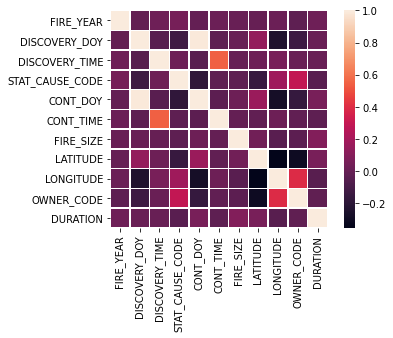

In [8]:
## COR. MATRIX ALL SIZES
corr = df.corr()
sn.color_palette("viridis")
sn.heatmap(corr, square=True, linewidths=.5)

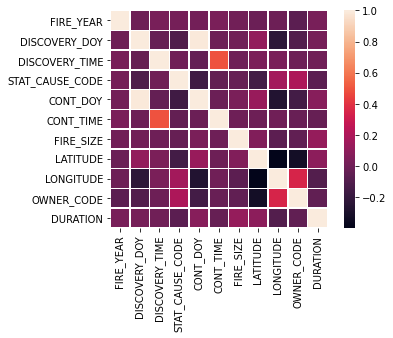

In [9]:
## COR. MATRIX WITHOUT SIZE A
df_NO_SIZE_A = df[df.FIRE_SIZE_CLASS!='A']
corr_NO_SIZE_A = df_NO_SIZE_A.corr()
sn.color_palette("viridis")
sn.heatmap(corr_NO_SIZE_A, square=True, linewidths=.5)

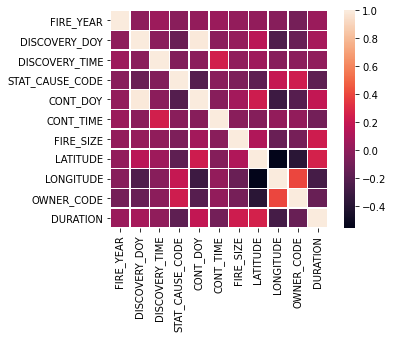

In [10]:
## COR. MATRIX WITHOUT SIZES A + B
df_NO_SIZE_A_B = df[(df.FIRE_SIZE_CLASS !='A') & (df.FIRE_SIZE_CLASS!='B')]
corr_NO_SIZE_A_B = df_NO_SIZE_A_B.corr()
sn.color_palette("viridis")
sn.heatmap(corr_NO_SIZE_A_B, square=True, linewidths=.5)

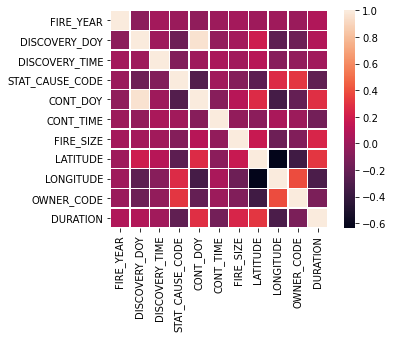

In [11]:
## COR. MATRIX WITHOUT SIZES A + B + C
df_NO_SIZE_A_B_C = df[(df.FIRE_SIZE_CLASS > 'C')]
corr_NO_SIZE_A_B_C = df_NO_SIZE_A_B_C.corr()
sn.color_palette("viridis")
sn.heatmap(corr_NO_SIZE_A_B_C, square=True, linewidths=.5)

### WHAT ABOUT WITH SIZE AS A CONTINUOUS VARIABLE?

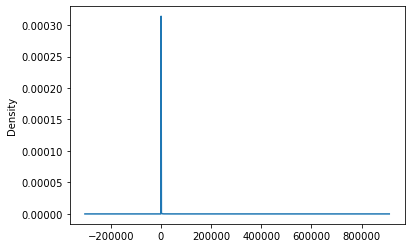

In [46]:
fire_size = df.FIRE_SIZE
fire_size_kde = fire_size.plot.kde()

In [36]:
df_SIZE_A = df[df['FIRE_SIZE_CLASS']=='A']
df_SIZE_B = df[df['FIRE_SIZE_CLASS']=='B']
df_SIZE_C = df[df['FIRE_SIZE_CLASS']=='C']
df_SIZE_D = df[df['FIRE_SIZE_CLASS']=='D']
df_SIZE_E = df[df['FIRE_SIZE_CLASS']=='E']
df_SIZE_F = df[df['FIRE_SIZE_CLASS']=='F']
df_SIZE_G = df[df['FIRE_SIZE_CLASS']=='G']
print('Complete.')

Complete.


(0.0, 0.25)

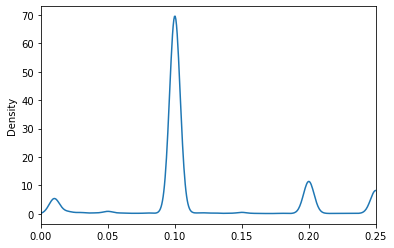

In [37]:
sizes_A = df_SIZE_A.FIRE_SIZE
sizes_A_kde = sizes_A.plot.kde()
sizes_A_kde.set_xlim([0, 0.25])

(0.0, 10.0)

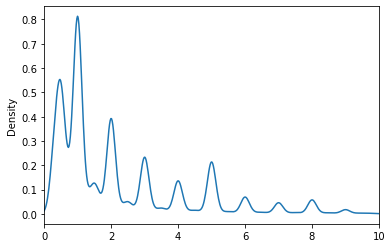

In [38]:
sizes_B = df_SIZE_B.FIRE_SIZE
sizes_B_kde = sizes_B.plot.kde()
sizes_B_kde.set_xlim([0, 10])

^PEOPLE PROBABLY just call it a whole number of acres

(0.0, 100.0)

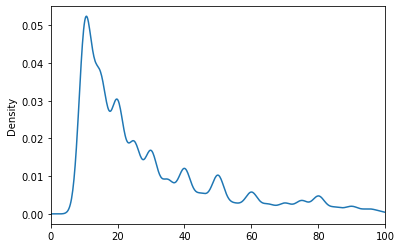

In [39]:
sizes_C = df_SIZE_C.FIRE_SIZE
sizes_C_kde = sizes_C.plot.kde()
sizes_C_kde.set_xlim([0, 100])

(0.0, 300.0)

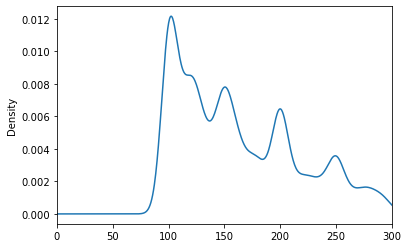

In [41]:
sizes_D = df_SIZE_D.FIRE_SIZE
sizes_D_kde = sizes_D.plot.kde()
sizes_D_kde.set_xlim([0, 300])

(0.0, 1000.0)

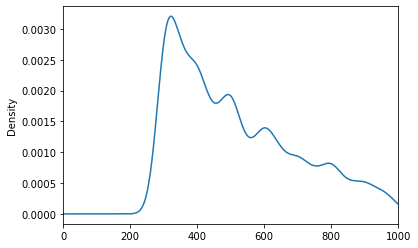

In [43]:
sizes_E = df_SIZE_E.FIRE_SIZE
sizes_E_kde = sizes_E.plot.kde()
sizes_E_kde.set_xlim([0, 1000])

(0.0, 5000.0)

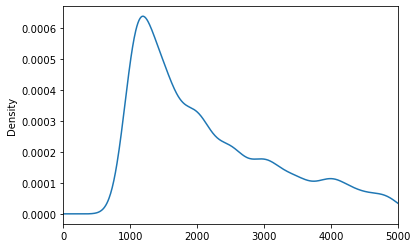

In [44]:
sizes_F = df_SIZE_F.FIRE_SIZE
sizes_F_kde = sizes_F.plot.kde()
sizes_F_kde.set_xlim([0, 5000])

(0.0, 700000.0)

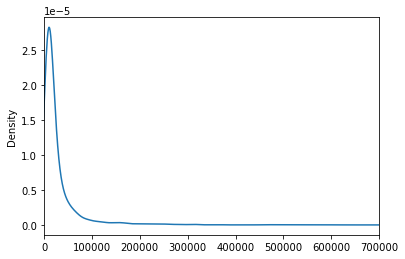

In [45]:
sizes_G = df_SIZE_G.FIRE_SIZE
sizes_G_kde = sizes_G.plot.kde()
sizes_G_kde.set_xlim([0, 700000])

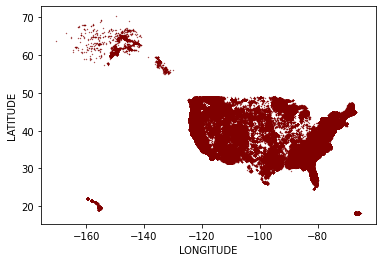

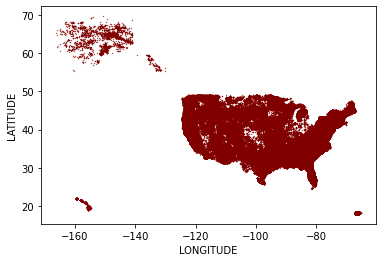

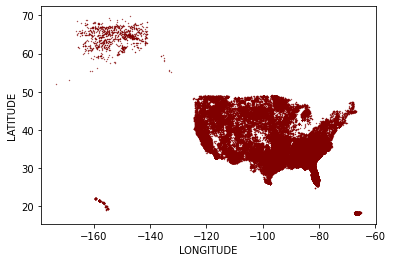

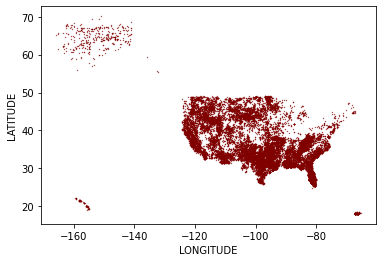

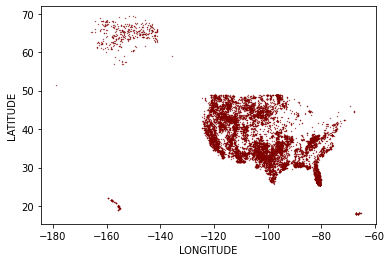

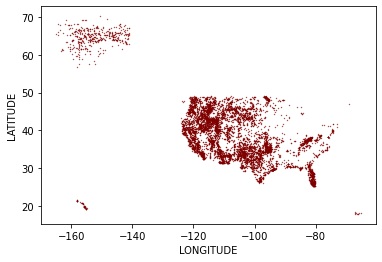

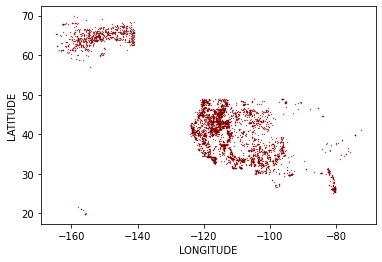

In [48]:
size_A_scatter = df_SIZE_A.plot.scatter(x='LONGITUDE', y='LATITUDE', c='maroon', s=0.1)
size_B_scatter = df_SIZE_B.plot.scatter(x='LONGITUDE', y='LATITUDE', c='maroon', s=0.1)
size_C_scatter = df_SIZE_C.plot.scatter(x='LONGITUDE', y='LATITUDE', c='maroon', s=0.1)
size_D_scatter = df_SIZE_D.plot.scatter(x='LONGITUDE', y='LATITUDE', c='maroon', s=0.1)
size_E_scatter = df_SIZE_E.plot.scatter(x='LONGITUDE', y='LATITUDE', c='maroon', s=0.1)
size_F_scatter = df_SIZE_F.plot.scatter(x='LONGITUDE', y='LATITUDE', c='maroon', s=0.1)
size_G_scatter = df_SIZE_G.plot.scatter(x='LONGITUDE', y='LATITUDE', c='maroon', s=0.1)

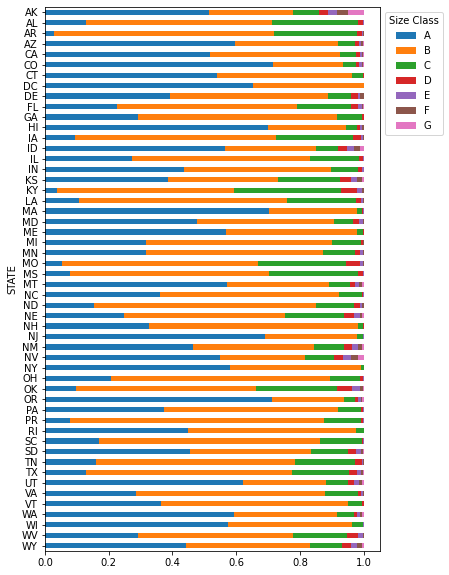

In [59]:
## SIZE BY STATE
size_by_stat_counts = df.groupby(['STATE'])['FIRE_SIZE_CLASS'].value_counts(normalize=True)
size_by_state_plot = size_by_state_counts.unstack().plot.barh(stacked=True, figsize=(6, 10))
size_by_state_plot.legend(title='Size Class', bbox_to_anchor=(1, 1), loc='upper left')
size_by_state_plot.invert_yaxis()

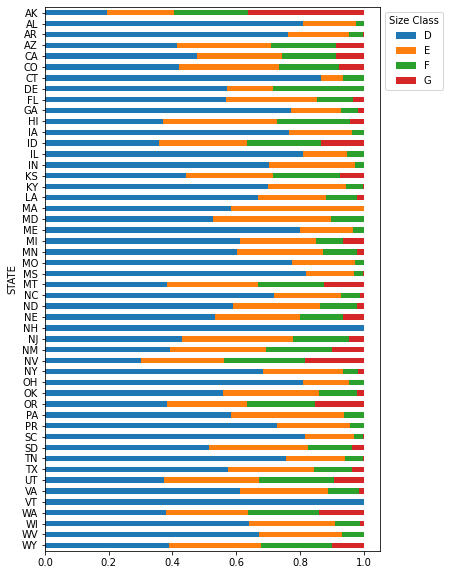

In [60]:
## SIZE BY STATE: DEFG
size_by_state_DEFG_counts = df_NO_SIZE_A_B_C.groupby(['STATE'])['FIRE_SIZE_CLASS'].value_counts(normalize=True)
size_by_state_DEFG_plot = size_by_state_DEFG_counts.unstack().plot.barh(stacked=True, figsize=(6, 10))
size_by_state_DEFG_plot.legend(title='Size Class', bbox_to_anchor=(1, 1), loc='upper left')
size_by_state_DEFG_plot.invert_yaxis()

## DISCOVERY?

(0.0, 366.0)

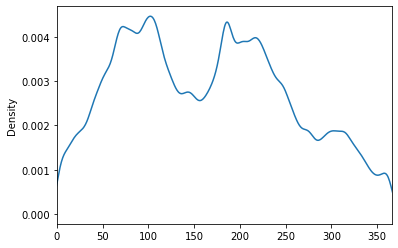

In [46]:
discovery_doy = df['DISCOVERY_DOY']
discovery_doy_kde = discovery_doy.plot.kde()
discovery_doy_kde.set_xlim([0, 366])

(0.0, 2400.0)

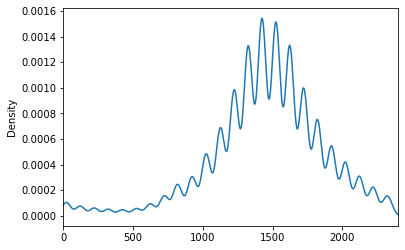

In [47]:
discovery_time = df['DISCOVERY_TIME']
discovery_time_kde = discovery_time.plot.kde()
discovery_time_kde.set_xlim([0, 2400])

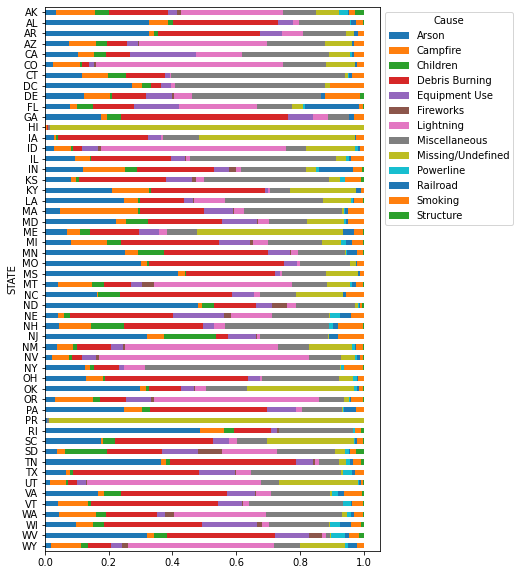

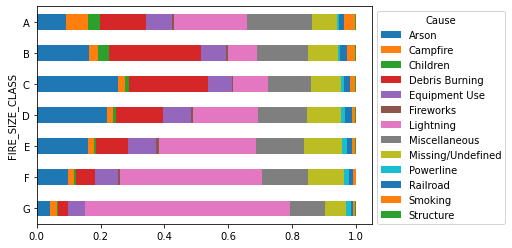

In [61]:
## CAUSE BY STATE
cause_by_state = df.groupby(['STATE'])['STAT_CAUSE_DESCR'].value_counts(normalize=True)
cause_by_state_plot = cause_by_state.unstack().plot.barh(stacked=True, figsize=(6, 10))
cause_by_state_plot.legend(title='Cause', bbox_to_anchor=(1, 1), loc='upper left')
cause_by_state_plot.invert_yaxis()

## SIZE BY CAUSE
cause_by_size = df.groupby('FIRE_SIZE_CLASS')['STAT_CAUSE_DESCR'].value_counts(normalize=True)
cause_by_size_plot = cause_by_size.unstack().plot.barh(stacked=True,figsize=(6, 4))
cause_by_size_plot.legend(title='Cause', bbox_to_anchor=(1, 1), loc='upper left')
cause_by_size_plot.invert_yaxis()


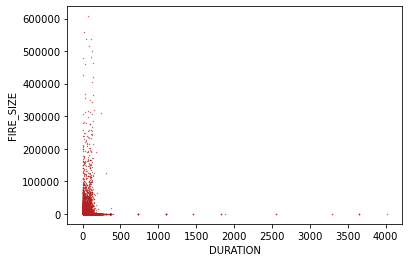

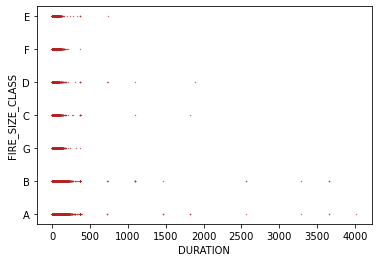

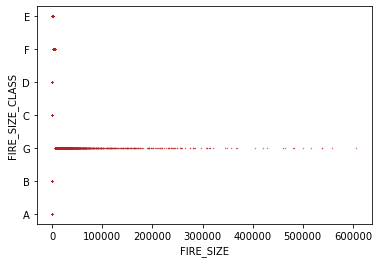

In [34]:
df.plot.scatter(x='DURATION', y='FIRE_SIZE', c='firebrick', s=0.1)
df.plot.scatter(x='DURATION', y='FIRE_SIZE_CLASS', c='firebrick', s=0.1)